In [1]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.statespace.varmax import VARMAX
from statsmodels.tsa.api import VAR
from statsmodels.tsa.stattools import grangercausalitytests, adfuller
from tqdm import tqdm_notebook
from itertools import product

import matplotlib.pyplot as plt
import statsmodels.api as sm
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')


C:\Users\Sarwar\anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.25.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
#df = pd.read_excel(r'Fixed_stations_large1.xlsx', sheet_name='Fixed Station')
df1 = pd.read_excel(r'Fixed_stations_large1.xlsx')

In [3]:
# unit='s' to convert it into epoch time
df1['Datetime'] = pd.to_datetime(df1['timestamp'], unit='s')

In [4]:
#To consider all the values use <df = df1>
df = df1.head(10000)
df

,timestamp,sensor ID,pm2.5(ug/m3),pm10(ug/m3),latitude,longitude,Datetime
0,1648771251,869170034045121,5.40,7.18,53.336920,-6.293910,2022-04-01 00:00:51
1,1648771253,869170033931073,4.50,6.57,53.336917,-6.293908,2022-04-01 00:00:53
2,1648771256,869170034081928,7.05,9.35,53.336925,-6.293848,2022-04-01 00:00:56
3,1648771261,869170033930547,4.95,5.40,53.336923,-6.293840,2022-04-01 00:01:01
4,1648771271,869170034081928,6.90,8.09,53.336918,-6.293830,2022-04-01 00:01:11
...,...,...,...,...,...,...,...
9995,1648805159,869170034050733,4.52,5.20,53.406833,-6.217285,2022-04-01 09:25:59
9996,1648805161,869170033931073,0.62,1.12,53.525587,-6.102313,2022-04-01 09:26:01
9997,1648805166,869170034045121,1.20,1.83,53.364160,-6.241035,2022-04-01 09:26:06
9998,1648805178,869170033935751,1.07,1.35,53.384298,-6.236685,2022-04-01 09:26:18


In [5]:
df.rename({'pm2.5(ug/m3)': 'pm2.5', 'pm10(ug/m3)': 'pm10'}, axis=1, inplace=True)
df

,timestamp,sensor ID,pm2.5,pm10,latitude,longitude,Datetime
0,1648771251,869170034045121,5.40,7.18,53.336920,-6.293910,2022-04-01 00:00:51
1,1648771253,869170033931073,4.50,6.57,53.336917,-6.293908,2022-04-01 00:00:53
2,1648771256,869170034081928,7.05,9.35,53.336925,-6.293848,2022-04-01 00:00:56
3,1648771261,869170033930547,4.95,5.40,53.336923,-6.293840,2022-04-01 00:01:01
4,1648771271,869170034081928,6.90,8.09,53.336918,-6.293830,2022-04-01 00:01:11
...,...,...,...,...,...,...,...
9995,1648805159,869170034050733,4.52,5.20,53.406833,-6.217285,2022-04-01 09:25:59
9996,1648805161,869170033931073,0.62,1.12,53.525587,-6.102313,2022-04-01 09:26:01
9997,1648805166,869170034045121,1.20,1.83,53.364160,-6.241035,2022-04-01 09:26:06
9998,1648805178,869170033935751,1.07,1.35,53.384298,-6.236685,2022-04-01 09:26:18


In [6]:
# Resetting the index
df.set_index('Datetime', inplace=True)
df

,timestamp,sensor ID,pm2.5,pm10,latitude,longitude
Datetime,,,,,,
2022-04-01 00:00:51,1648771251,869170034045121,5.40,7.18,53.336920,-6.293910
2022-04-01 00:00:53,1648771253,869170033931073,4.50,6.57,53.336917,-6.293908
2022-04-01 00:00:56,1648771256,869170034081928,7.05,9.35,53.336925,-6.293848
2022-04-01 00:01:01,1648771261,869170033930547,4.95,5.40,53.336923,-6.293840
2022-04-01 00:01:11,1648771271,869170034081928,6.90,8.09,53.336918,-6.293830
...,...,...,...,...,...,...
2022-04-01 09:25:59,1648805159,869170034050733,4.52,5.20,53.406833,-6.217285
2022-04-01 09:26:01,1648805161,869170033931073,0.62,1.12,53.525587,-6.102313
2022-04-01 09:26:06,1648805166,869170034045121,1.20,1.83,53.364160,-6.241035


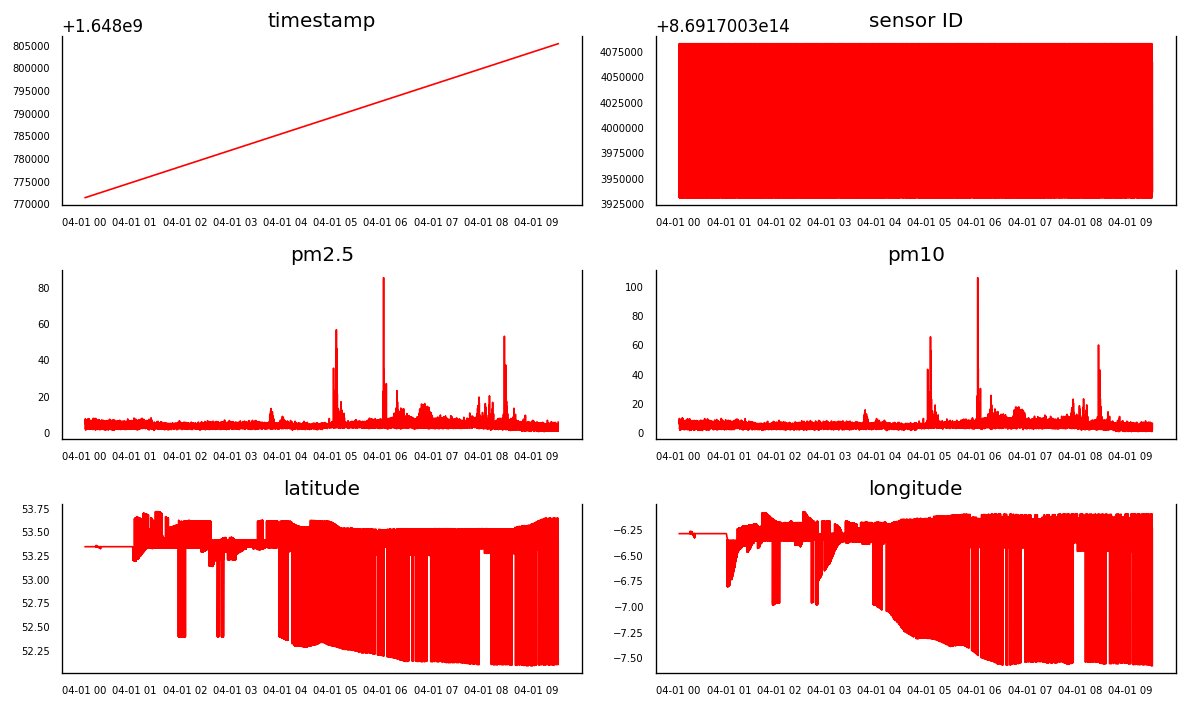

In [7]:

fig, axes = plt.subplots(nrows=3, ncols=2, dpi=120, figsize=(10,6))
for i, ax in enumerate(axes.flatten()):
    if i<6:
        data = df[df.columns[i]]
        ax.plot(data, color='red', linewidth=1)
        # Decorations
        ax.set_title(df.columns[i])
        ax.xaxis.set_ticks_position('none')
        ax.yaxis.set_ticks_position('none')
        ax.spines["top"].set_alpha(0)
        ax.tick_params(labelsize=6)

plt.tight_layout();


In [8]:
ad_fuller_result_1 = adfuller(df['pm2.5'].diff()[1:])

print('pm2.5')
print(f'ADF Statistic: {ad_fuller_result_1[0]}')
print(f'p-value: {ad_fuller_result_1[1]}')

print('\n---------------------\n')

ad_fuller_result_2 = adfuller(df['pm10'].diff()[1:])

print('pm10')
print(f'ADF Statistic: {ad_fuller_result_2[0]}')
print(f'p-value: {ad_fuller_result_2[1]}')

pm2.5
ADF Statistic: -25.910944485283622
p-value: 0.0

---------------------

pm10
ADF Statistic: -25.849716529479107
p-value: 0.0


In [9]:
# Grange causality means that past values of x2 have a statistically significant effect on the current value of x1
print('pm2.5 causes polution by effecting pm10?\n')
print('------------------')
granger_1 = grangercausalitytests(df[['pm2.5', 'pm10']], 4)

print('\nulc causes polution by effecting pm10?\n')
print('------------------')
granger_2 = grangercausalitytests(df[['pm2.5', 'pm10']], 4)

pm2.5 causes polution by effecting pm10?

------------------

Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0890  , p=0.7654  , df_denom=9996, df_num=1
ssr based chi2 test:   chi2=0.0890  , p=0.7654  , df=1
likelihood ratio test: chi2=0.0890  , p=0.7654  , df=1
parameter F test:         F=0.0890  , p=0.7654  , df_denom=9996, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=1.1212  , p=0.3259  , df_denom=9993, df_num=2
ssr based chi2 test:   chi2=2.2435  , p=0.3257  , df=2
likelihood ratio test: chi2=2.2433  , p=0.3257  , df=2
parameter F test:         F=1.1212  , p=0.3259  , df_denom=9993, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=1.1030  , p=0.3464  , df_denom=9990, df_num=3
ssr based chi2 test:   chi2=3.3115  , p=0.3461  , df=3
likelihood ratio test: chi2=3.3109  , p=0.3461  , df=3
parameter F test:         F=1.1030  , p=0.3464  , df_denom=9990, df_num=3

Granger Causality
number o

In [10]:
macro_data = df[['pm2.5','pm10']]
print(macro_data.shape)

(10000, 2)


In [11]:
train_df=macro_data[:-12]
test_df=macro_data[-12:]

In [12]:
train_df

,pm2.5,pm10
Datetime,,
2022-04-01 00:00:51,5.40,7.18
2022-04-01 00:00:53,4.50,6.57
2022-04-01 00:00:56,7.05,9.35
2022-04-01 00:01:01,4.95,5.40
2022-04-01 00:01:11,6.90,8.09
...,...,...
2022-04-01 09:25:23,0.67,0.80
2022-04-01 09:25:24,4.48,5.95
2022-04-01 09:25:25,0.42,0.63


In [13]:
print(test_df.shape)

(12, 2)


In [14]:
model = VAR(train_df.diff()[1:])

In [15]:
sorted_order=model.select_order(maxlags=20)
print(sorted_order.summary())

 VAR Order Selection (* highlights the minimums)  
       AIC         BIC         FPE         HQIC   
--------------------------------------------------
0        1.648       1.650       5.198       1.649
1        1.084       1.089       2.958       1.086
2       0.8383      0.8455       2.312      0.8407
3       0.7065      0.7167       2.027      0.7100
4       0.6296      0.6426       1.877      0.6340
5       0.5714      0.5873       1.771      0.5768
6       0.5285      0.5473       1.696      0.5348
7       0.4879      0.5096       1.629      0.4952
8       0.4433      0.4679       1.558      0.4516
9       0.3931      0.4206       1.482      0.4024
10      0.3070      0.3373       1.359      0.3172
11      0.2818      0.3151       1.326      0.2931
12      0.2630      0.2992       1.301      0.2752
13      0.2562      0.2952       1.292      0.2694
14      0.2460      0.2880       1.279      0.2602
15      0.2416      0.2865       1.273      0.2568
16      0.2333      0.2810     

In [16]:
var_model = VARMAX(train_df, order=(4,0),enforce_stationarity= True)
fitted_model = var_model.fit(disp=False)
print(fitted_model.summary())

                           Statespace Model Results                           
Dep. Variable:      ['pm2.5', 'pm10']   No. Observations:                 9988
Model:                         VAR(4)   Log Likelihood              -29877.327
                          + intercept   AIC                          59796.653
Date:                Tue, 05 Sep 2023   BIC                          59948.045
Time:                        13:37:15   HQIC                         59847.902
Sample:                             0                                         
                               - 9988                                         
Covariance Type:                  opg                                         
Ljung-Box (L1) (Q):             0.18, 0.00   Jarque-Bera (JB):   47663000.19, 9019.48
Prob(Q):                        0.67, 0.96   Prob(JB):                     0.00, 0.00
Heteroskedasticity (H):         4.99, 1.05   Skew:                        12.02, 1.03
Prob(H) (two-sided):           

In [17]:
n_forecast = 12
predict = fitted_model.get_prediction(start=len(train_df),end=len(train_df) + n_forecast-1)#start="2022-04-01",end='2022-05-01')

predictions=predict.predicted_mean

In [25]:
predictions.columns=['pm2.5_predicted','pm10_predicted']
predictions

,pm2.5_predicted,pm10_predicted
9988,3.329502,4.245131
9989,3.142707,4.038576
9990,3.301396,4.229463
9991,3.481833,4.447234
9992,3.660067,4.648713
9993,3.676742,4.669052
9994,3.711510,4.710587
9995,3.741982,4.746596
9996,3.760335,4.768412
9997,3.766743,4.776071


In [18]:
test_df

,pm2.5,pm10
Datetime,,
2022-04-01 09:25:41,1.47,1.94
2022-04-01 09:25:43,1.32,1.87
2022-04-01 09:25:45,1.83,2.67
2022-04-01 09:25:47,0.35,0.42
2022-04-01 09:25:53,0.93,1.13
2022-04-01 09:25:58,0.53,0.93
2022-04-01 09:25:58,2.42,3.48
2022-04-01 09:25:59,4.52,5.20
2022-04-01 09:26:01,0.62,1.12


In [19]:
test_df = test_df.reset_index(drop=True)
test_df

,pm2.5,pm10
0,1.47,1.94
1,1.32,1.87
2,1.83,2.67
3,0.35,0.42
4,0.93,1.13
5,0.53,0.93
6,2.42,3.48
7,4.52,5.20
8,0.62,1.12
9,1.20,1.83


In [26]:
test_vs_pred=pd.concat([test_df, predictions],axis=1)

<AxesSubplot: >

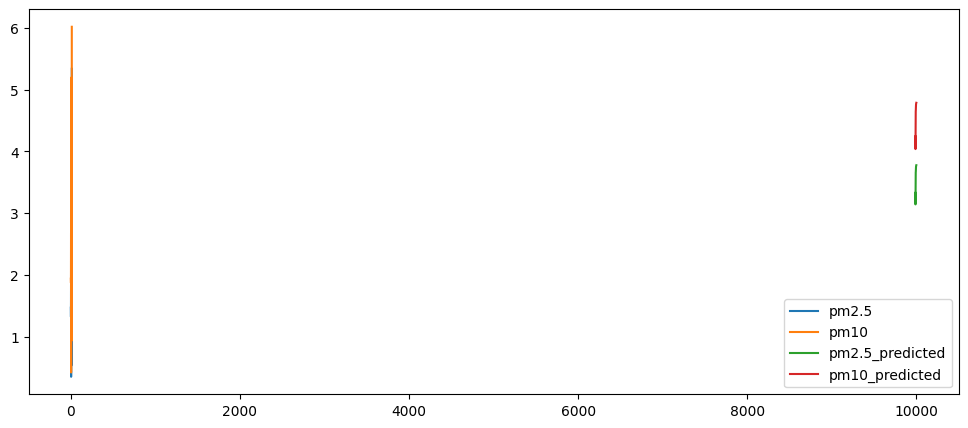

In [27]:
test_vs_pred.plot(figsize=(12,5))

In [29]:
from sklearn.metrics import mean_squared_error
import math 
from statistics import mean

rmse_pm10 = math.sqrt(mean_squared_error(predictions['pm10_predicted'],test_df['pm10']))
print('Mean value of pm10 is : {}. Root Mean Squared Error is :{}'.format(mean(test_df['pm10']),rmse_pm10))

rmse_pm2_5 = math.sqrt(mean_squared_error(predictions['pm2.5_predicted'],test_df['pm2.5']))
print('Mean value of pm2.5 is : {}. Root Mean Squared Error is :{}'.format(mean(test_df['pm2.5']),rmse_pm2_5))

Mean value of pm10 is : 2.33. Root Mean Squared Error is :2.76953290902998
Mean value of pm2.5 is : 1.8. Root Mean Squared Error is :2.3198337955142394
